In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import string
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('amazonrev.csv')

In [3]:
df.shape

(20875, 3)

In [4]:
df.head()

,Unnamed: 0,Rating,Review
0,0,5,The laptop came in excellent package - the pac...
1,1,5,I bought it on June 13 2021 at the price of 57...
2,2,5,Its superb\nIts world's lightest laptop\nSuper...
3,3,4,Ordered it a few days ago in the Amazon sale a...
4,4,5,Display and the design looks good. The blue li...


In [5]:
df.Rating.value_counts()

5    4780
1    4421
4    4280
3    3815
2    3579
Name: Rating, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20875 entries, 0 to 20874
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20875 non-null  int64 
 1   Rating      20875 non-null  int64 
 2   Review      20847 non-null  object
dtypes: int64(2), object(1)
memory usage: 489.4+ KB


In [7]:
df.isnull().sum()

Unnamed: 0     0
Rating         0
Review        28
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df['txt length'] = df['Review'].apply(len) #new column which keep counts of the total words in the review

# EDA

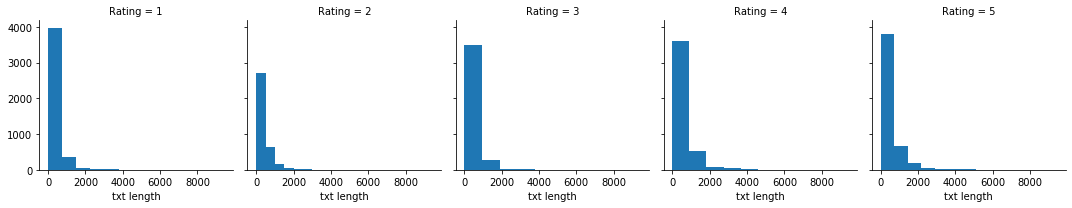

In [10]:
g = sns.FacetGrid(df, col='Rating')
g.map(plt.hist,'txt length')

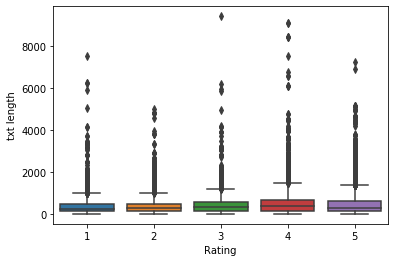

In [11]:
sns.boxplot(data=df, x='Rating', y='txt length')

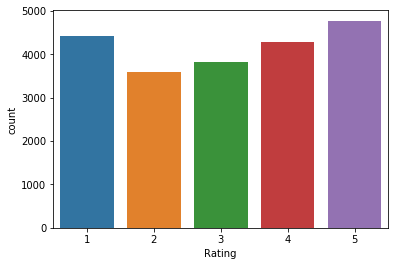

In [12]:
sns.countplot(df['Rating'])

Text(0.5, 1.0, 'Data Distribution')

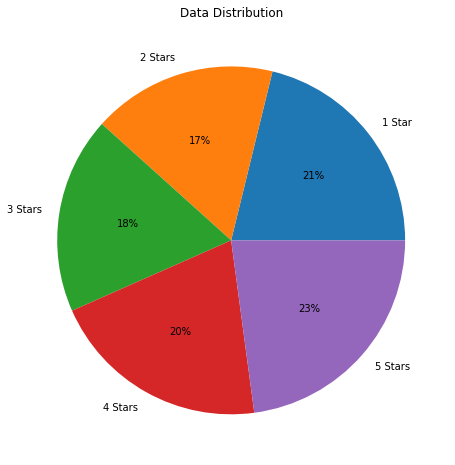

In [13]:
vals = [df.Rating[df.Rating==1].count() , df.Rating[df.Rating==2].count(), df.Rating[df.Rating==3].count(),
        df.Rating[df.Rating==4].count(), df.Rating[df.Rating==5].count()]
plt.figure(figsize = (15, 8))
label = ['1 Star' , '2 Stars', '3 Stars', '4 Stars', '5 Stars']
plt.pie(vals , labels=label , autopct = '%1.0f%%')
plt.title('Data Distribution')

# NLP Classification Task

In [14]:
x = df['Review']
y = df['Rating']

In [15]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
CV = CountVectorizer()

In [17]:
x = CV.fit_transform(x)

In [18]:
print('Shape of Sparse Matrix: ', x.shape)
print('Amount of Non-Zero occurences: ', x.nnz)

Shape of Sparse Matrix:  (20847, 26492)
Amount of Non-Zero occurences:  1102578


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [20]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
pred = nb.predict(x_test)

In [21]:
print(confusion_matrix(y_test, pred))

[[ 951  104  107   70   37]
 [ 318  343  161  134   85]
 [ 203   83  449  284  138]
 [ 109   38  102  675  392]
 [  92   25   47  275 1033]]


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.57      0.75      0.65      1269
           2       0.58      0.33      0.42      1041
           3       0.52      0.39      0.44      1157
           4       0.47      0.51      0.49      1316
           5       0.61      0.70      0.65      1472

    accuracy                           0.55      6255
   macro avg       0.55      0.54      0.53      6255
weighted avg       0.55      0.55      0.54      6255



In [23]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1085   66   56   36   26]
 [ 340  470  108   70   53]
 [ 199   71  568  170  149]
 [ 115   23   92  704  382]
 [  83   18   48  201 1122]]
              precision    recall  f1-score   support

           1       0.60      0.86      0.70      1269
           2       0.73      0.45      0.56      1041
           3       0.65      0.49      0.56      1157
           4       0.60      0.53      0.56      1316
           5       0.65      0.76      0.70      1472

    accuracy                           0.63      6255
   macro avg       0.64      0.62      0.62      6255
weighted avg       0.64      0.63      0.62      6255



In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[800 215 128  61  65]
 [217 555 122  74  73]
 [143 136 600 157 121]
 [ 90  90 182 686 268]
 [ 91  86 133 281 881]]
              precision    recall  f1-score   support

           1       0.60      0.63      0.61      1269
           2       0.51      0.53      0.52      1041
           3       0.52      0.52      0.52      1157
           4       0.54      0.52      0.53      1316
           5       0.63      0.60      0.61      1472

    accuracy                           0.56      6255
   macro avg       0.56      0.56      0.56      6255
weighted avg       0.56      0.56      0.56      6255



In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer())
])

In [27]:
pipeline1 = Pipeline([
    ('pipeline', pipeline),
    ('classifier',MultinomialNB())
])
pipeline2 = Pipeline([
    ('pipeline', pipeline),
    ('classifier',DecisionTreeClassifier())
])
pipeline3 = Pipeline([
    ('pipeline', pipeline),
    ('classifier',RandomForestClassifier())
])


In [28]:
x = df['Review']
y= df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
pipeline1.fit(x_train, y_train)
pred = pipeline1.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1033   21   31   91   93]
 [ 466  129   56  179  211]
 [ 256   20  213  330  338]
 [ 117    6   22  546  625]
 [  83    7   12  124 1246]]
              precision    recall  f1-score   support

           1       0.53      0.81      0.64      1269
           2       0.70      0.12      0.21      1041
           3       0.64      0.18      0.29      1157
           4       0.43      0.41      0.42      1316
           5       0.50      0.85      0.63      1472

    accuracy                           0.51      6255
   macro avg       0.56      0.48      0.44      6255
weighted avg       0.55      0.51      0.45      6255



In [30]:
pipeline2.fit(x_train, y_train)
pred = pipeline2.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[805 197 140  69  58]
 [201 558 147  75  60]
 [145 153 586 150 123]
 [ 98  85 153 717 263]
 [ 96  77 112 267 920]]
              precision    recall  f1-score   support

           1       0.60      0.63      0.62      1269
           2       0.52      0.54      0.53      1041
           3       0.51      0.51      0.51      1157
           4       0.56      0.54      0.55      1316
           5       0.65      0.62      0.64      1472

    accuracy                           0.57      6255
   macro avg       0.57      0.57      0.57      6255
weighted avg       0.57      0.57      0.57      6255



In [31]:
pipeline3.fit(x_train, y_train)
pred = pipeline3.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1092   62   51   35   29]
 [ 353  471   99   52   66]
 [ 212   68  569  157  151]
 [ 119   25   75  705  392]
 [  80   15   44  184 1149]]
              precision    recall  f1-score   support

           1       0.59      0.86      0.70      1269
           2       0.73      0.45      0.56      1041
           3       0.68      0.49      0.57      1157
           4       0.62      0.54      0.58      1316
           5       0.64      0.78      0.71      1472

    accuracy                           0.64      6255
   macro avg       0.65      0.62      0.62      6255
weighted avg       0.65      0.64      0.63      6255



In [32]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process))
])

In [46]:
pipeline1 = Pipeline([
    ('pipeline', pipeline),
    ('mnb',MultinomialNB())
])
pipeline2 = Pipeline([
    ('pipeline', pipeline),
    ('classifier',DecisionTreeClassifier())
])
pipeline3 = Pipeline([
    ('pipeline', pipeline),
    ('classifier',RandomForestClassifier())
])


In [34]:
x = df['Review']
y = df['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = df['Rating'])

In [35]:
pipeline1.fit(x_train, y_train)
pred = pipeline1.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 986   93  107   91   48]
 [ 295  367  160  144  107]
 [ 166   91  425  282  180]
 [  78   23   75  654  452]
 [  60   12   43  236 1080]]
              precision    recall  f1-score   support

           1       0.62      0.74      0.68      1325
           2       0.63      0.34      0.44      1073
           3       0.52      0.37      0.44      1144
           4       0.46      0.51      0.49      1282
           5       0.58      0.75      0.65      1431

    accuracy                           0.56      6255
   macro avg       0.56      0.54      0.54      6255
weighted avg       0.56      0.56      0.55      6255



In [36]:
pipeline2.fit(x_train, y_train)
pred = pipeline2.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[853 223 108  75  66]
 [198 550 136  94  95]
 [139 130 589 137 149]
 [ 82  91 124 685 300]
 [ 81  82 118 230 920]]
              precision    recall  f1-score   support

           1       0.63      0.64      0.64      1325
           2       0.51      0.51      0.51      1073
           3       0.55      0.51      0.53      1144
           4       0.56      0.53      0.55      1282
           5       0.60      0.64      0.62      1431

    accuracy                           0.58      6255
   macro avg       0.57      0.57      0.57      6255
weighted avg       0.57      0.58      0.57      6255



In [37]:
pipeline3.fit(x_train, y_train)
pred = pipeline3.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1066   69   85   47   58]
 [ 306  497   96   81   93]
 [ 181   79  560  150  174]
 [ 102   26   84  670  400]
 [  60   20   53  149 1149]]
              precision    recall  f1-score   support

           1       0.62      0.80      0.70      1325
           2       0.72      0.46      0.56      1073
           3       0.64      0.49      0.55      1144
           4       0.61      0.52      0.56      1282
           5       0.61      0.80      0.70      1431

    accuracy                           0.63      6255
   macro avg       0.64      0.62      0.62      6255
weighted avg       0.64      0.63      0.62      6255

